<a href="https://colab.research.google.com/github/Jassibro/EDA-PROJECT/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
rossman_store=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rossmann Stores Data.csv")
store=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store.csv')

<ipython-input-3-4b13163d7ade>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman_store=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rossmann Stores Data.csv")


### Dataset First View

In [4]:
# Dataset First Look
rossman_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
rossman_store.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
637150,156,6,2013-12-07,3936,462,1,0,0,0
312773,791,6,2014-10-11,6101,708,1,0,0,0
631582,163,4,2013-12-12,6409,844,1,0,0,0
914025,511,3,2013-04-03,5125,800,1,0,0,0
186812,608,6,2015-02-14,4706,502,1,0,0,0
630385,81,5,2013-12-13,6597,545,1,0,0,0
645221,422,6,2013-11-30,6226,587,1,0,0,0
36904,110,7,2015-06-28,0,0,0,0,0,0
350886,521,7,2014-08-31,0,0,0,0,0,0
440397,758,1,2014-06-02,7110,807,1,1,0,0


In [6]:
# Dataset First Look
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
store.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
314,315,a,c,38710.0,4.0,2013.0,0,NaN,NaN,NaN
377,378,a,c,2140.0,8.0,2012.0,0,NaN,NaN,NaN
165,166,a,c,100.0,4.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
745,746,d,c,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec"
658,659,d,a,1590.0,3.0,2012.0,0,NaN,NaN,NaN
400,401,a,c,9200.0,10.0,2009.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct"
45,46,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
413,414,d,c,6210.0,NaN,NaN,1,1.0,2013.0,"Jan,Apr,Jul,Oct"
145,146,d,c,8050.0,10.0,1961.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
863,864,a,a,1020.0,10.0,2012.0,1,45.0,2009.0,"Feb,May,Aug,Nov"


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
rows_and_columns=rossman_store.shape
print(f"There are {rows_and_columns[0]} Rows and {rows_and_columns[1]} Columns, in rossman_store dataset.")

There are 1017209 Rows and 9 Columns, in rossman_store dataset.


In [9]:
rows_and_columns_in_store=store.shape
print(f"There are {rows_and_columns_in_store[0]} Rows and {rows_and_columns_in_store[1]} Columns in Store dataset.")

There are 1115 Rows and 10 Columns in Store dataset.


### Dataset Information

In [10]:
# Dataset Info
rossman_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
# Dataset Info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
rossman_store[rossman_store.duplicated()].count()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [13]:
store[store.duplicated()].count()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
na_value_r=rossman_store.isna().sum()
na_value_r

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
na_value_s=store.isna().sum()
na_value_s

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

<Figure size 800x600 with 0 Axes>

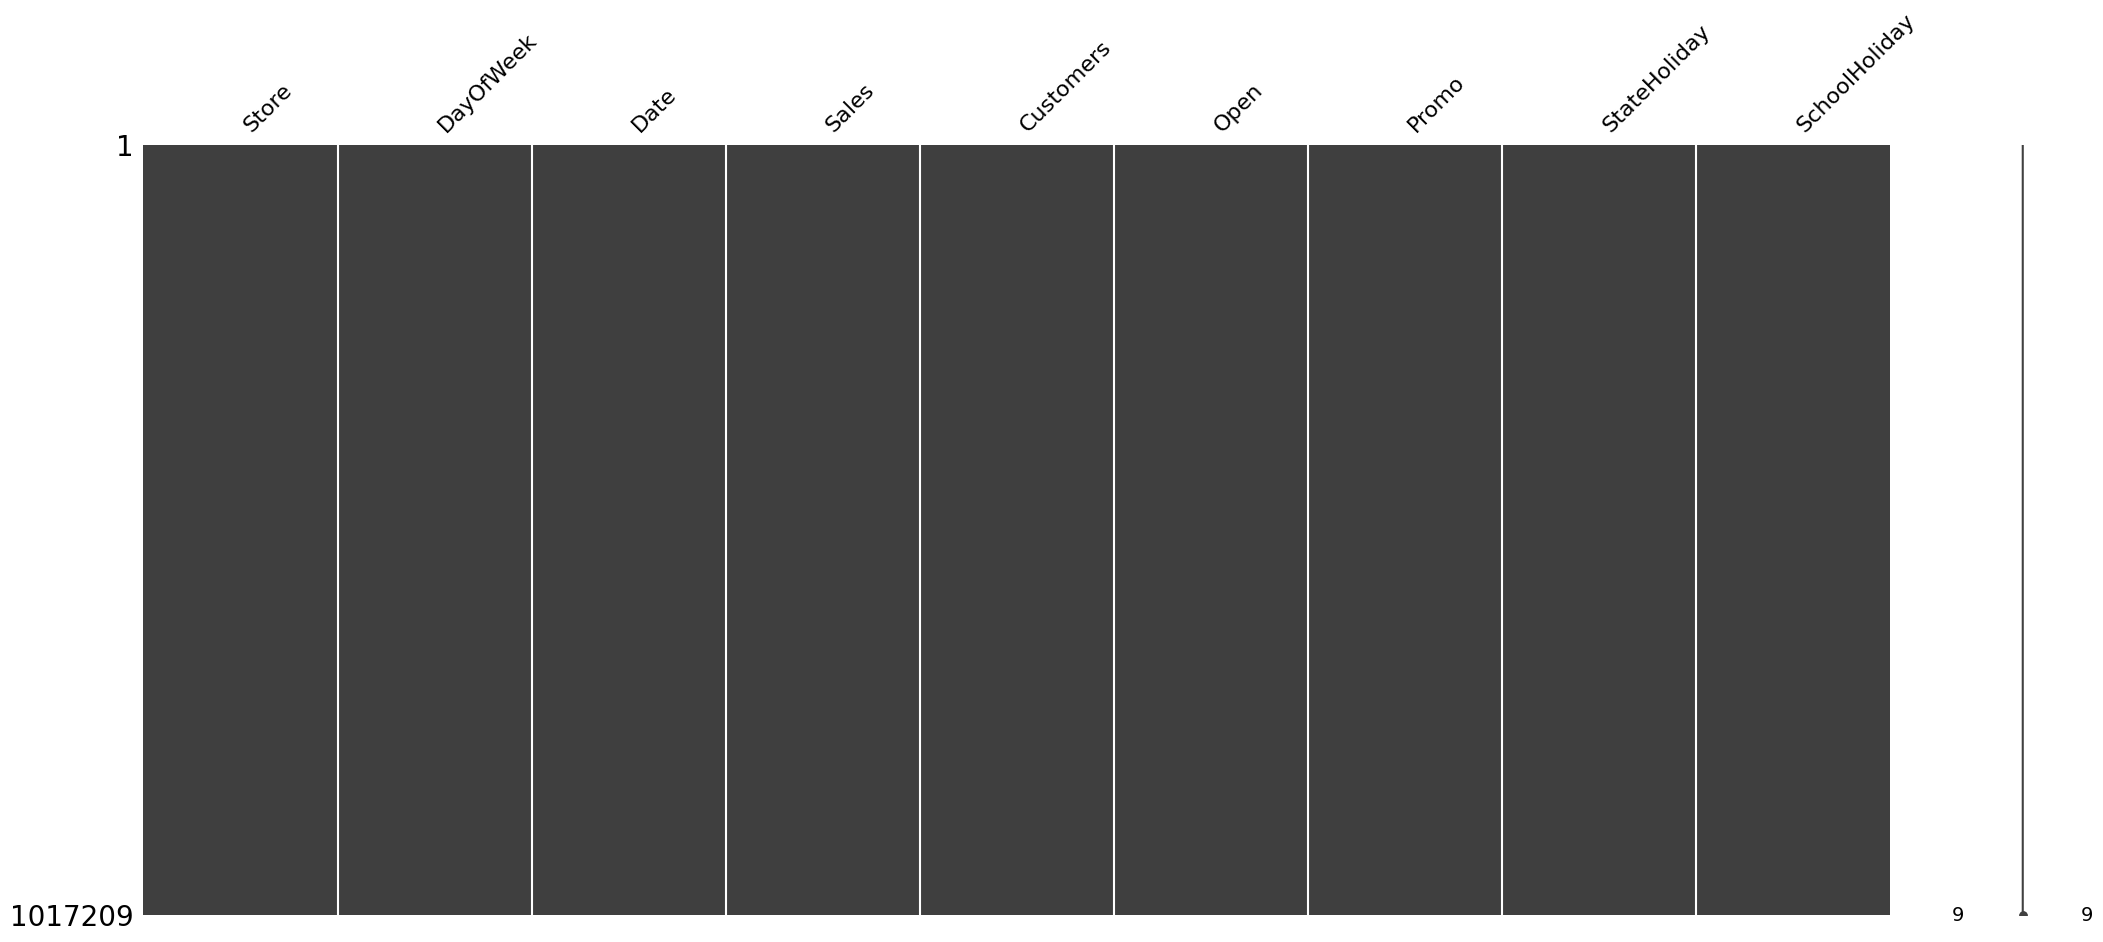

In [16]:
# Visualizing the missing values of rossman_store dataset
plt.figure(figsize=(8,6))
msno.matrix(rossman_store)

<Axes: >

<Figure size 800x600 with 0 Axes>

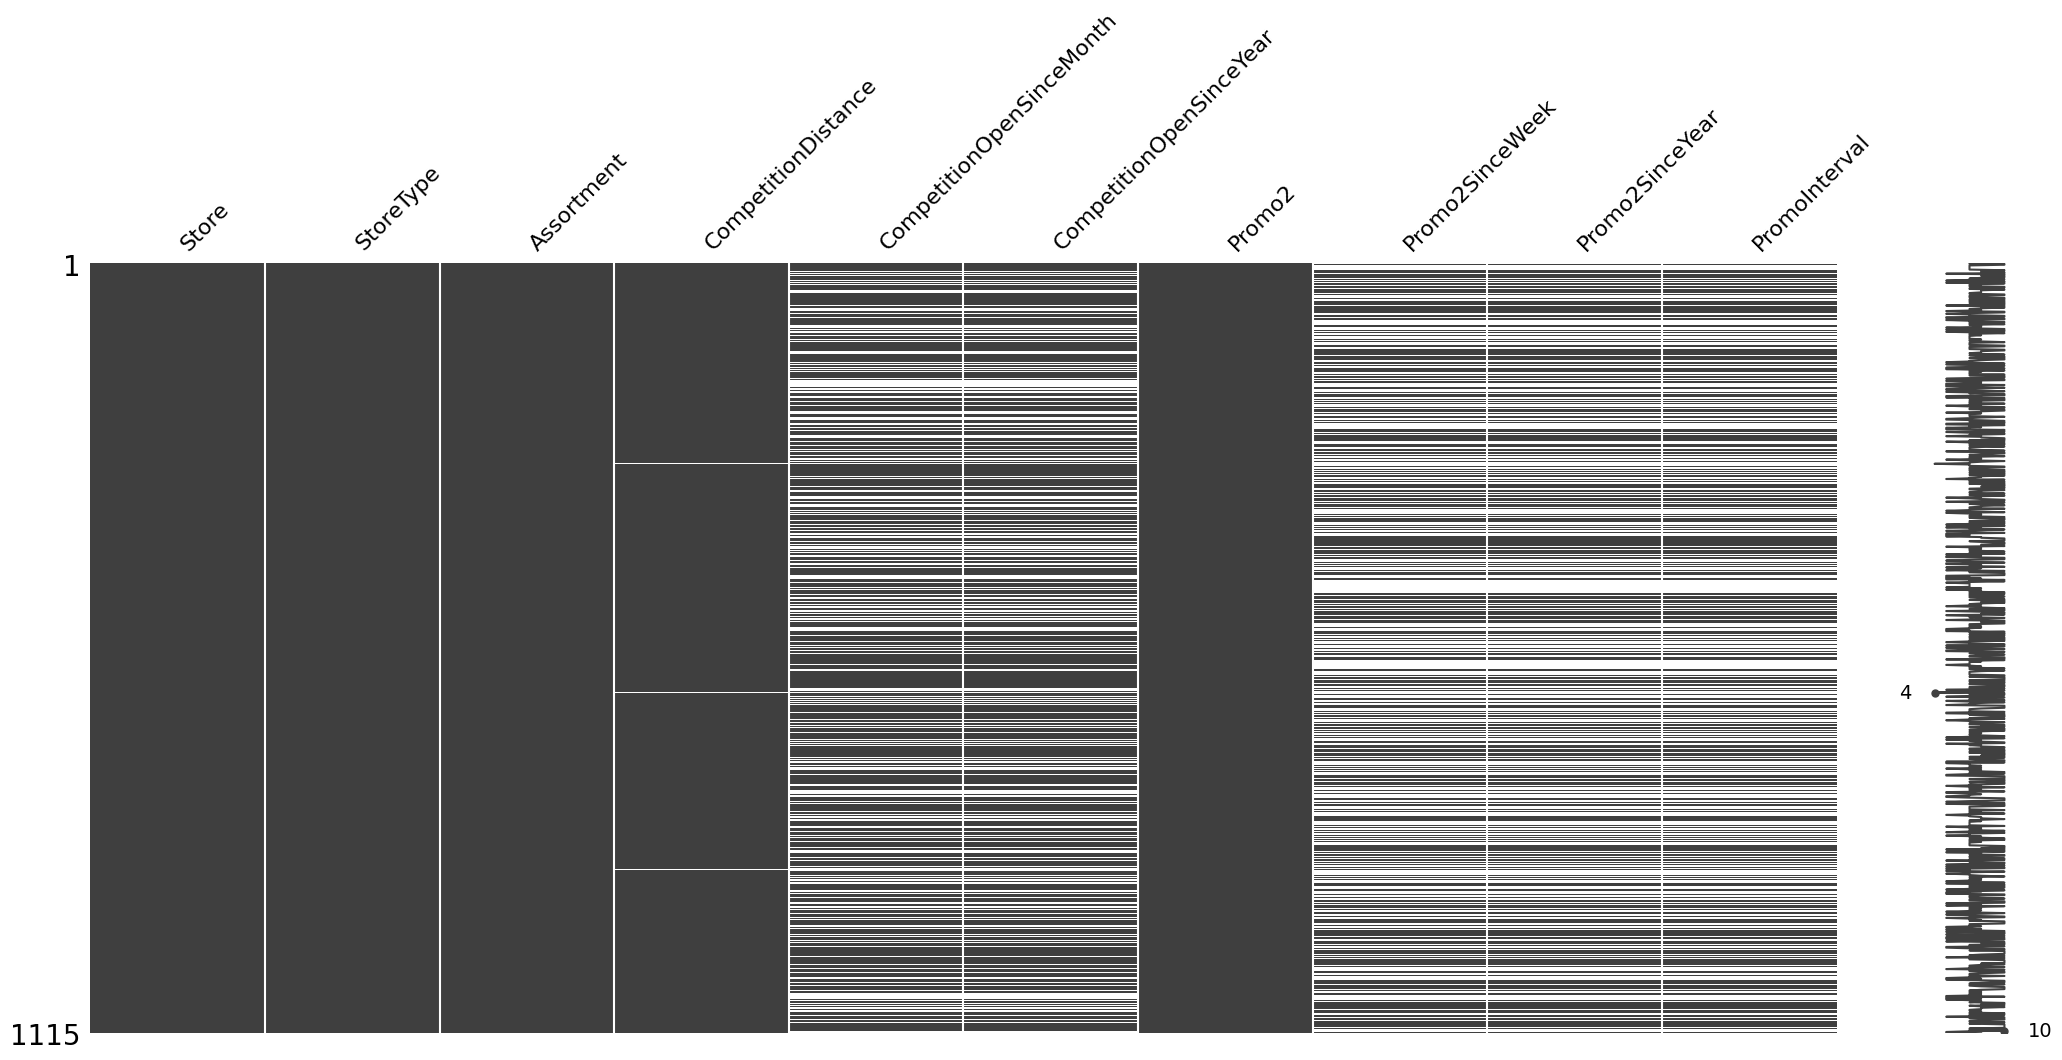

In [17]:
# Visualizing the missing values of store dataset
plt.figure(figsize=(8,6))
msno.matrix(store)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
rossman_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [19]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [20]:
# Dataset Describe
rossman_store.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [21]:
# Dataset Describe
store.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Variables Description 

**Store:** A unique identifier for each store.

**DayOfWeek:** The day of the week (1-7, where 1 represents Monday and 7 represents Sunday).

**Date:** The date of the sales data.

**Sales:** The amount of sales on a particular day for a specific store.

**Customers:** The number of customers on a particular day for a specific store.

**Open:** A binary variable indicating whether the store was open (1) or closed (0) on a particular day.

**Promo:** A binary variable indicating whether a promotion was active (1) or not (0) on a particular day.

**StateHoliday:** A categorical variable indicating if the day was a state holiday (a, b, c) or not (0).

**SchoolHoliday:** A binary variable indicating if it was a school holiday (1) or not (0).

**StoreType:** The type of store (categorical variable).

**Assortment:** The assortment level of the store (categorical variable).

**CompetitionDistance:** The distance to the nearest competitor store.

**CompetitionOpenSinceMonth:** The month when the nearest competitor store opened.

**CompetitionOpenSinceYear:** The year when the nearest competitor store opened.

**Promo2:** A binary variable indicating whether the store is participating in a continuing promotion (1) or not (0).

**Promo2SinceWeek:** The calendar week when the store started participating in Promo2.

**Promo2SinceYear:** The year when the store started participating in Promo2.

**PromoInterval:** The intervals at which Promo2 is started, indicating the consecutive months the promotion is active.

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
for var in rossman_store.columns:
  unique_count=rossman_store[var].nunique()
  print(f'{var}',unique_count)
  if unique_count<=5:
    print(f'uniques values in {var} are',rossman_store[var].unique())



Store 1115
DayOfWeek 7
Date 942
Sales 21734
Customers 4086
Open 2
uniques values in Open are [1 0]
Promo 2
uniques values in Promo are [1 0]
StateHoliday 5
uniques values in StateHoliday are ['0' 'a' 'b' 'c' 0]
SchoolHoliday 2
uniques values in SchoolHoliday are [1 0]


In [23]:
for va in store.columns:
  unique_count=store[va].nunique()
  print(f'{va}',unique_count)
  if unique_count<=5:
    print(f'unique values in {va} are',store[va].unique())

Store 1115
StoreType 4
unique values in StoreType are ['c' 'a' 'd' 'b']
Assortment 3
unique values in Assortment are ['a' 'c' 'b']
CompetitionDistance 654
CompetitionOpenSinceMonth 12
CompetitionOpenSinceYear 23
Promo2 2
unique values in Promo2 are [0 1]
Promo2SinceWeek 24
Promo2SinceYear 7
PromoInterval 3
unique values in PromoInterval are [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Filling null values in store dataset with mean,median or 0.
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(),inplace=True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mean(),inplace=True)
store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mean(),inplace=True)

In [25]:
store['Promo2SinceWeek'].fillna(0,inplace=True)
store['Promo2SinceYear'].fillna(0,inplace=True)
store['PromoInterval'].fillna(0,inplace=True)

In [26]:
rossman_store['StateHoliday']=rossman_store['StateHoliday'].replace(0,'0')
rossman_store['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [27]:
final=pd.merge(rossman_store,store,on='Store',how='left')

In [28]:
final.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
559732,788,6,2014-02-15,14419,1349,1,0,0,0,a,c,1530.0,3.000000,2013.000000,0,0.0,0.0,0
675257,353,7,2013-11-03,6709,1536,1,0,0,0,b,b,900.0,7.224704,2008.668857,1,14.0,2013.0,"Feb,May,Aug,Nov"
913102,703,4,2013-04-04,2919,363,1,0,0,1,a,a,80.0,6.000000,2005.000000,0,0.0,0.0,0
906730,1021,3,2013-04-10,7997,961,1,1,0,0,a,a,1080.0,5.000000,2011.000000,0,0.0,0.0,0
207737,348,1,2015-01-26,9773,804,1,1,0,0,a,a,16490.0,7.224704,2008.668857,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
571800,591,2,2014-02-04,6810,571,1,1,0,0,a,c,3340.0,7.224704,2008.668857,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
313470,502,5,2014-10-10,11375,1586,1,1,0,0,a,a,220.0,2.000000,2002.000000,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
742030,226,3,2013-09-04,5908,608,1,0,0,0,a,a,450.0,7.224704,2008.668857,0,0.0,0.0,0
267855,748,5,2014-11-28,8135,613,1,1,0,0,d,a,2380.0,3.000000,2010.000000,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
255550,562,4,2014-12-11,18293,3227,1,0,0,0,b,c,1210.0,7.224704,2008.668857,0,0.0,0.0,0


In [29]:
final.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.223450e+00,2.008683e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.652674e+00,4.949376e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,7.224704e+00,2.008669e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [30]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [31]:
final['Date']=pd.to_datetime(final['Date'],format='%Y-%m-%d')

In [32]:
final['CompetitionDistance']=final['CompetitionDistance'].astype(int)

In [33]:
final['CompetitionOpenSinceMonth']=pd.DatetimeIndex(final['CompetitionOpenSinceMonth']).month

In [34]:
final['CompetitionOpenSinceYear']=final['CompetitionOpenSinceYear'].astype(int)

In [35]:
final['Promo2SinceYear']=final['Promo2SinceWeek'].astype(int)
final['Promo2SinceWeek']=final['Promo2SinceWeek'].astype(int)

In [36]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [37]:
df=final.copy()

In [38]:
dependent_var=df['Sales']

In [39]:
num_var=df.describe().drop('Sales',axis=1).columns
num_var

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

In [40]:
cat_var=df.describe(include=['object']).columns
cat_var

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

In [41]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,1,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570,1,2007,1,13,13,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130,1,2006,1,14,14,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620,1,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910,1,2015,0,0,0,0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
#Q1.How does the sales vary across different days of the week? Are there any specific days that consistently exhibit higher or lower sales?



Text(0.5, 1.0, 'Sales during days of week')

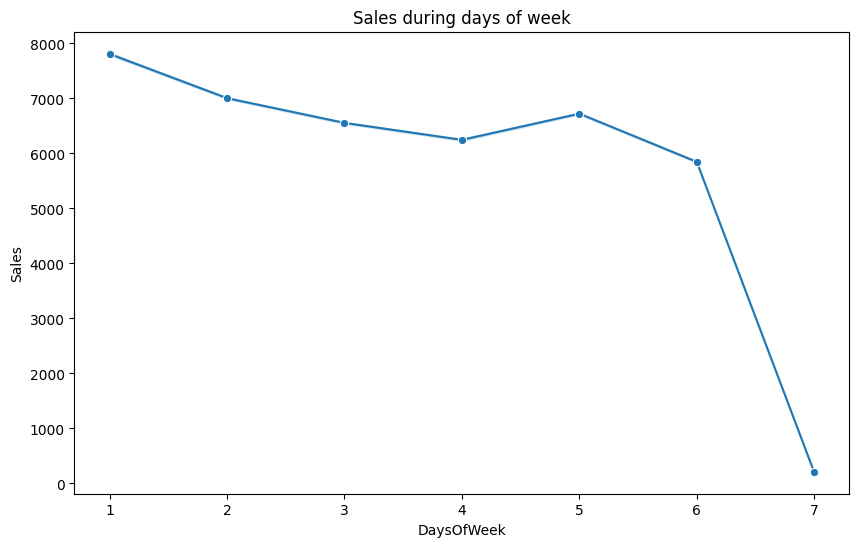

In [42]:
# Chart - 1 visualization code
fig=plt.figure(figsize=(10,6))
sns.lineplot(x='DayOfWeek',y='Sales',data=df,marker='o')
plt.xlabel('DaysOfWeek')
plt.ylabel('Sales')
plt.title('Sales during days of week')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2
#Q2-How does the sales vary across different storetypes?

Text(0, 0.5, 'Sales')

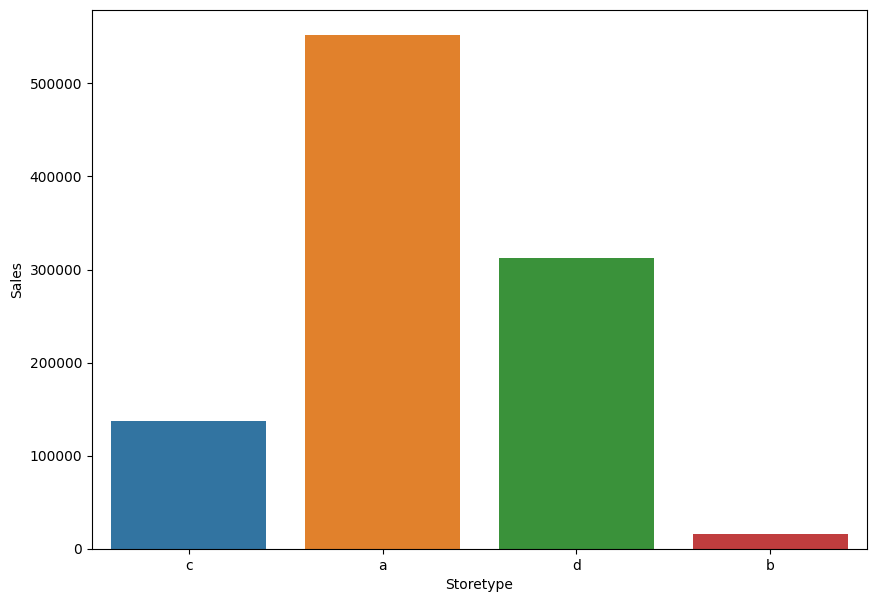

In [43]:
# Chart - 2 visualization code
fig=plt.figure(figsize=(10,7))
sns.countplot(x='StoreType',data=df)
plt.xlabel('Storetype')
plt.ylabel('Sales')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3
#Q3-How does the sales and customers vary when it is a stateholiday or schoolholiday?

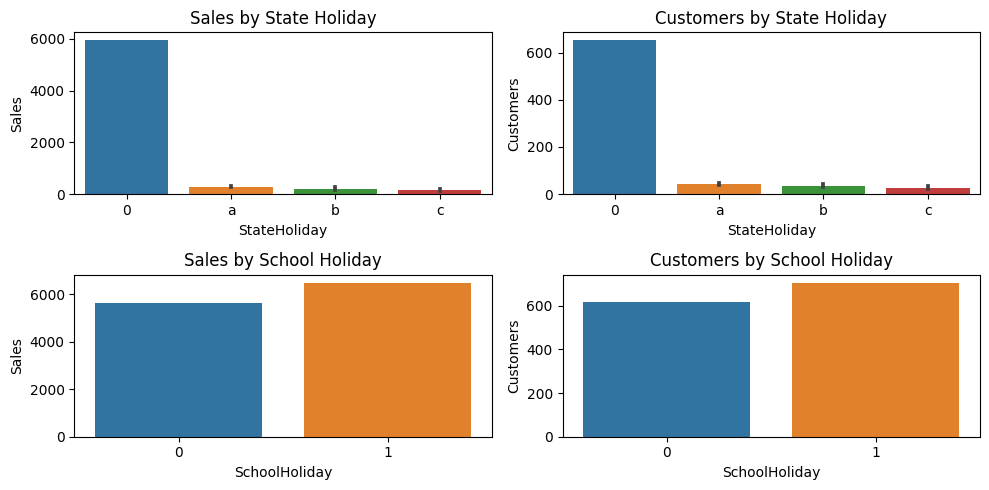

In [44]:
# Chart - 3 visualization code
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
sns.barplot(x='StateHoliday', y='Sales', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Sales by State Holiday')
sns.barplot(x='StateHoliday', y='Customers', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Customers by State Holiday')
sns.barplot(x='SchoolHoliday', y='Sales', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Sales by School Holiday')
sns.barplot(x='SchoolHoliday', y='Customers', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Customers by School Holiday')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4
#Q4-How does the Sales and Customers vary due to Promo?

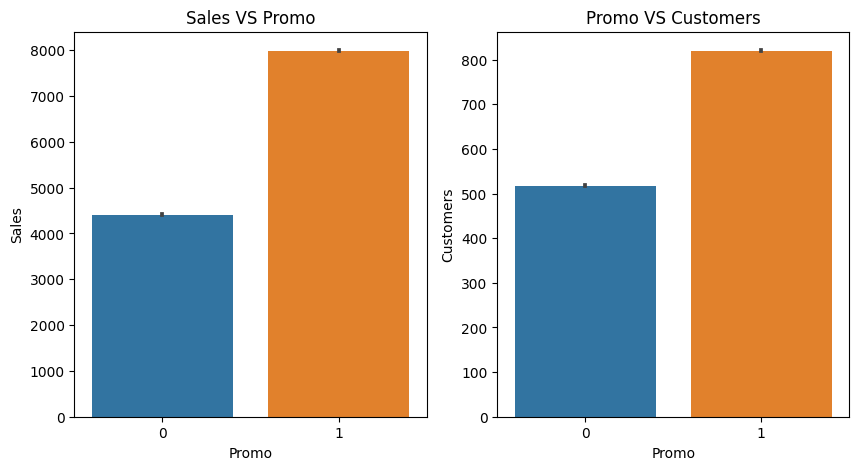

In [47]:
# Chart - 4 visualization code
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='Promo',y='Sales',data=df,ax=axis1)
axis1.title.set_text('Sales VS Promo')
sns.barplot(x='Promo',y='Customers',data=df,ax=axis2)
axis2.title.set_text('Promo VS Customers')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5
#Q5-How does the Sales vary across different storetypes and assortments?

<Axes: xlabel='StoreType', ylabel='Sales'>

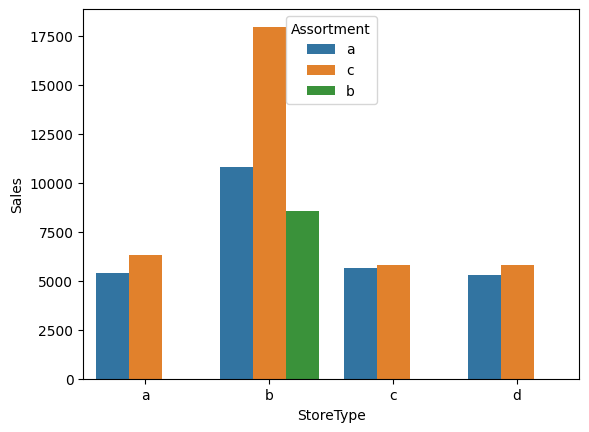

In [48]:
# Chart - 5 visualization code
var=df.groupby(['StoreType','Assortment'])['Sales'].mean().reset_index()
sns.barplot(x='StoreType',y='Sales',hue='Assortment',data=var)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6
#How does the Sales vary by CompetitionDistance?

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

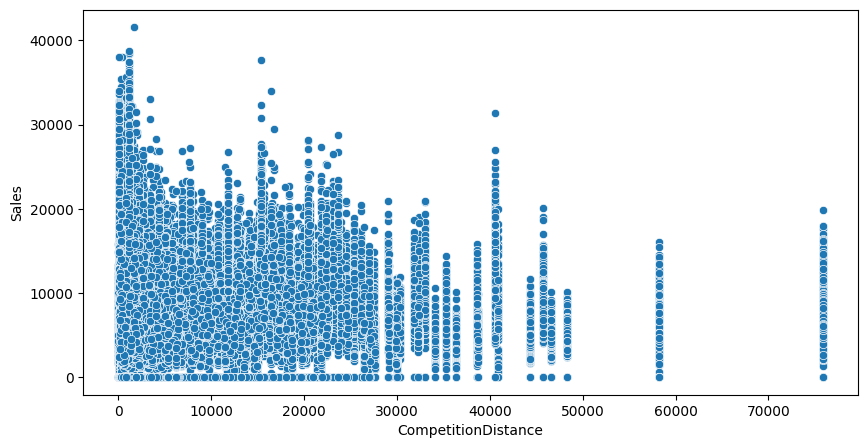

In [51]:
# Chart - 6 visualization code
fig=plt.figure(figsize=(10,5))
sns.scatterplot(x='CompetitionDistance',y='Sales',data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
Dis

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***